<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
path = '/content/drive/MyDrive/Dataset/extended_marketing_data.xlsx'

In [4]:
df = pd.read_excel(path)
df.head()

,Customer ID,Age,Gender,Total Spent,Converted,Comments
0,1,23,F,150,1,Satisfied with the service
1,2,35,M,600,1,Needs improvement in delivery
2,3,45,F,800,0,Regular customer
3,4,52,M,200,0,Occasional buyer
4,5,29,F,300,1,High spender
5,6,41,M,450,0,Average experience
6,7,38,F,670,1,Prefers online shopping
7,8,27,M,120,1,New customer
8,9,50,F,500,0,Loyal to the brand
9,10,33,M,750,1,High conversion rate


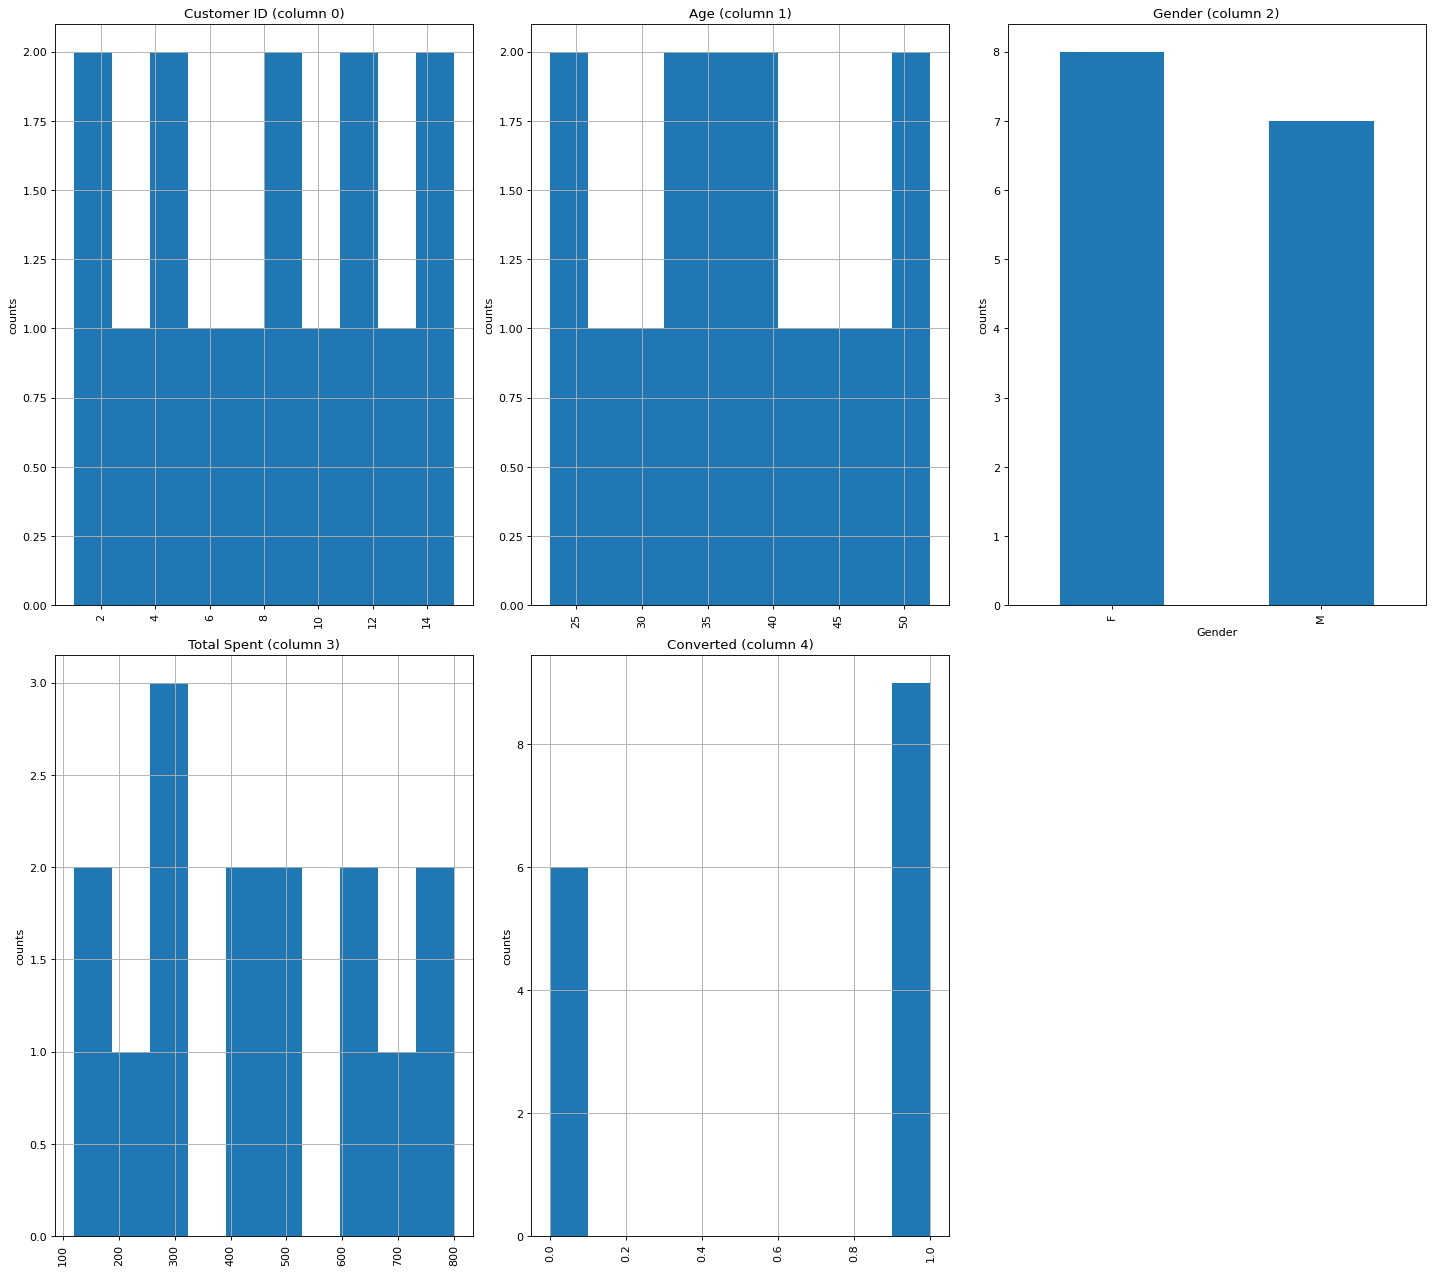

In [8]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()

    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)

    nGraphRow = int(np.ceil(nCol / nGraphPerRow))
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80)

    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]

        if not np.issubdtype(columnDf.dtype, np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()

        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

plotPerColumnDistribution(df, nGraphShown=5, nGraphPerRow=3)


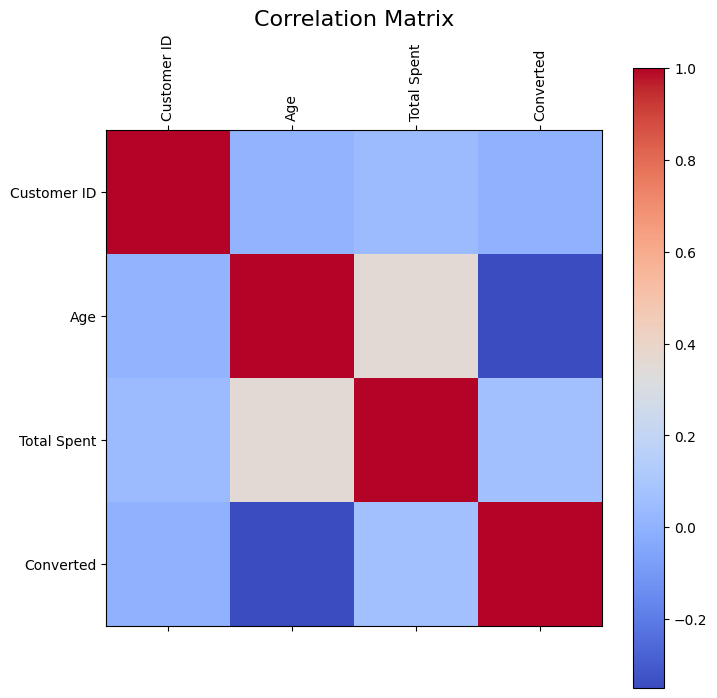

In [9]:
def plotCorrelationMatrix(df, graphWidth):

    df = df.select_dtypes(include=[np.number])


    corr = df.corr()


    plt.figure(figsize=(graphWidth, graphWidth))
    plt.matshow(corr, cmap='coolwarm', fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar()
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

plotCorrelationMatrix(df, 8)

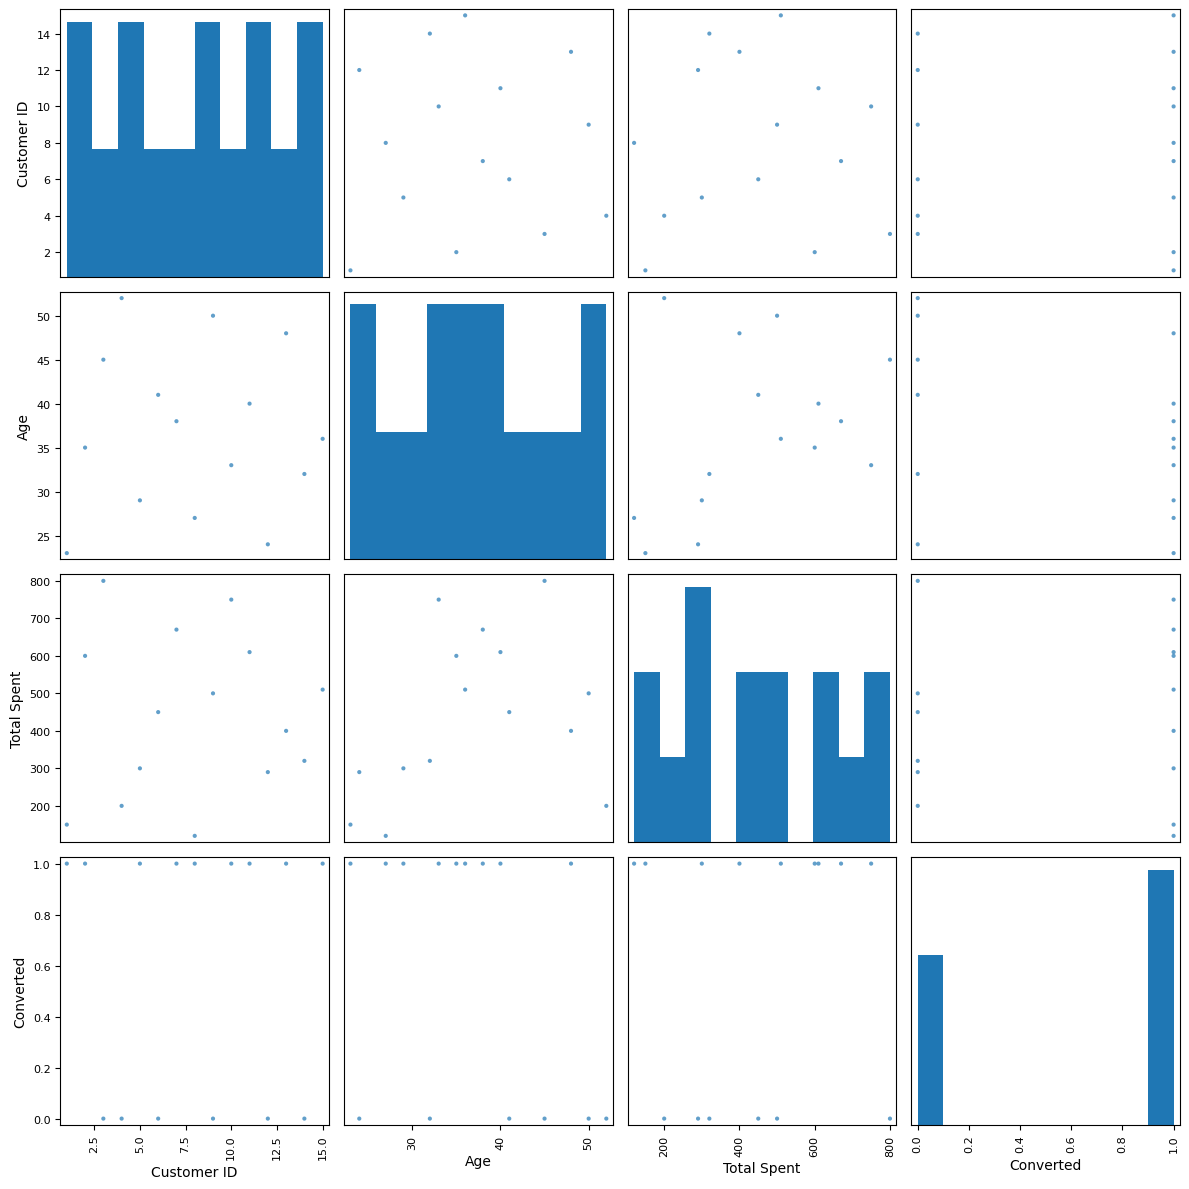

In [10]:
from pandas.plotting import scatter_matrix

def plotScatterMatrix(df, nGraphShown, graphWidth, graphHeight):

    df = df.select_dtypes(include=[np.number])


    scatter_matrix(df, figsize=(graphWidth, graphHeight), diagonal= 'hist', alpha=0.7)
    plt.tight_layout()
    plt.show()

plotScatterMatrix(df, nGraphShown=5, graphWidth=12, graphHeight=12)

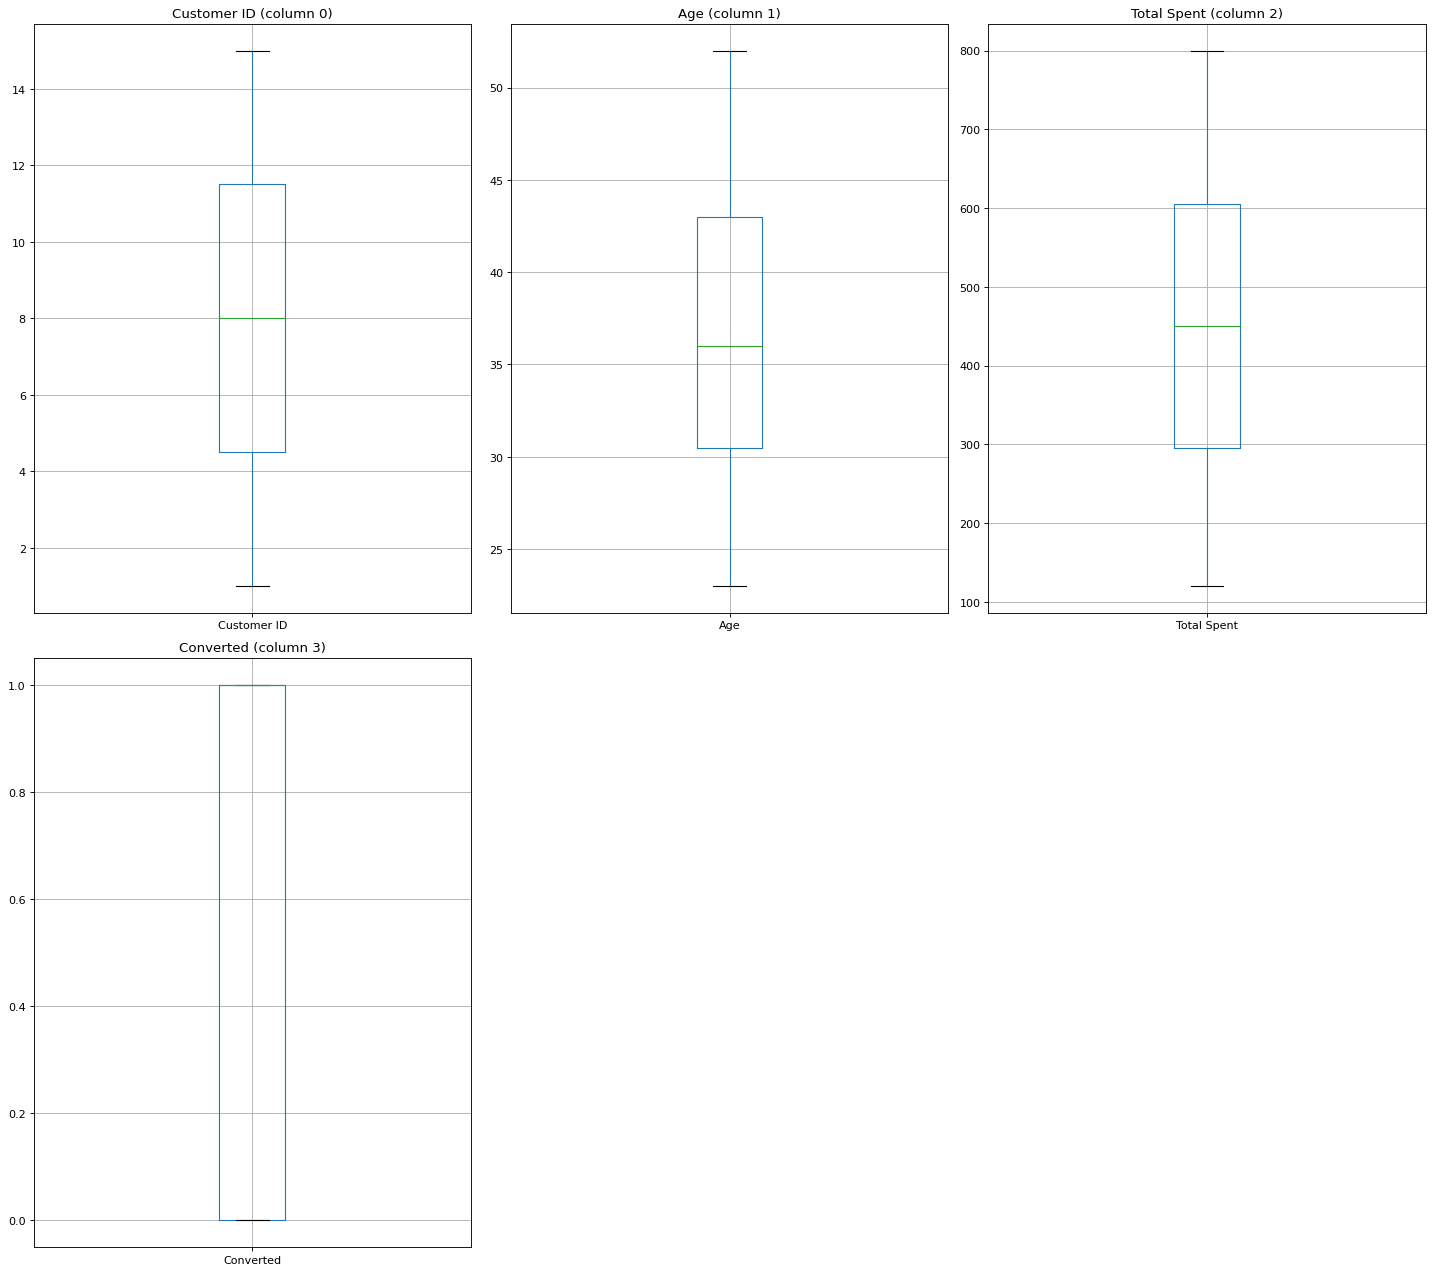

In [13]:
def plotBoxplots(df, nGraphShown, nGraphPerRow):

    df = df.select_dtypes(include=[np.number])
    nRow, nCol = df.shape
    columnNames = list(df)


    nGraphRow = int(np.ceil(nCol / nGraphPerRow))
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80)

    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        df.boxplot(column=columnNames[i])
        plt.title(f'{columnNames[i]} (column {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

plotBoxplots(df, nGraphShown=5, nGraphPerRow=3)

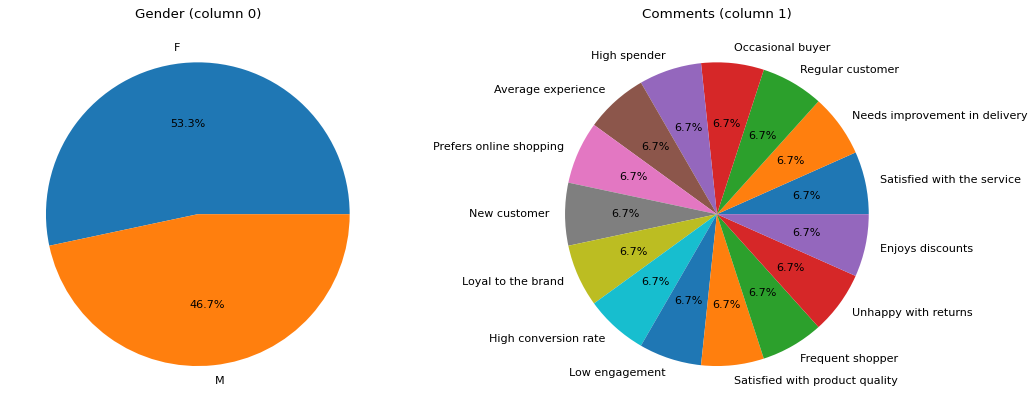

In [16]:
def plotPieCharts(df, nGraphShown, nGraphPerRow):

    df = df.select_dtypes(exclude=[np.number])
    nRow, nCol = df.shape
    columnNames = list(df)


    nGraphRow = int(np.ceil(nCol / nGraphPerRow))
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80)

    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        df[columnNames[i]].value_counts().plot.pie(autopct='%1.1f%%')
        plt.ylabel('')
        plt.title(f'{columnNames[i]} (column {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

plotPieCharts(df, nGraphShown=5, nGraphPerRow=3)

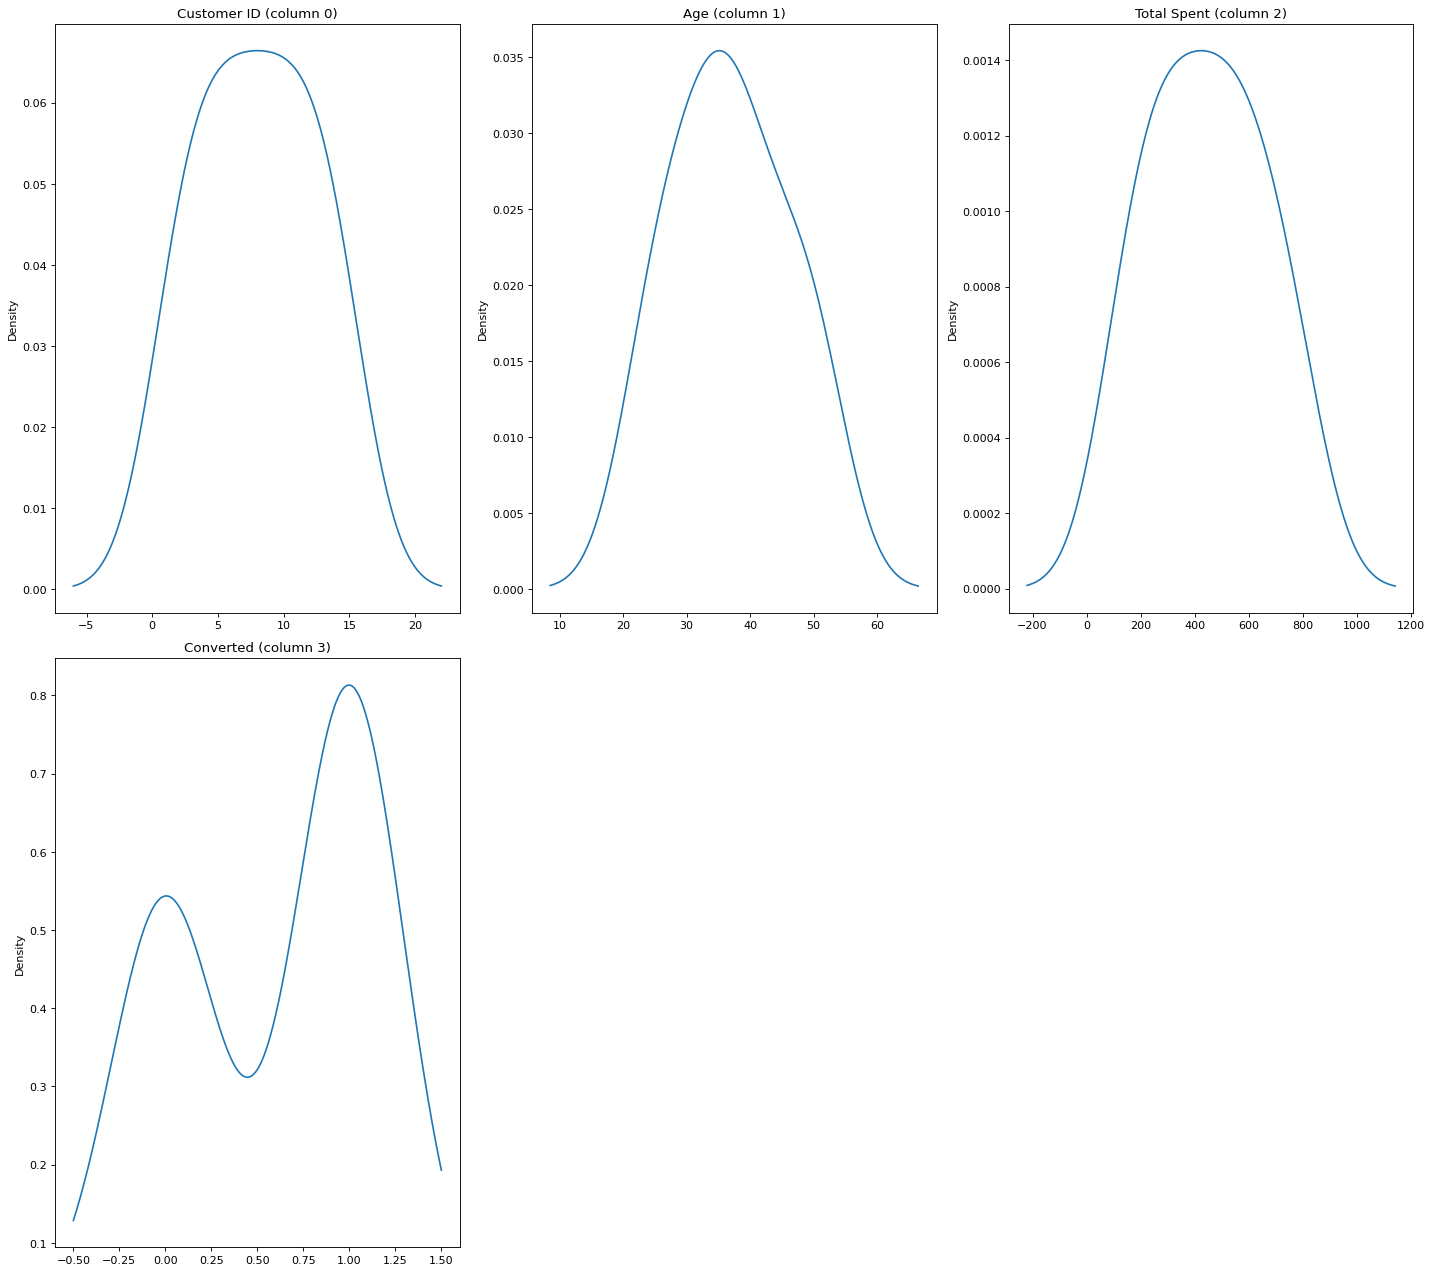

In [18]:
def plotDensityPlots(df, nGraphShown, nGraphPerRow):

    df = df.select_dtypes(include=[np.number])
    nRow, nCol = df.shape
    columnNames = list(df)


    nGraphRow = int(np.ceil(nCol / nGraphPerRow))
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80)

    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        df[columnNames[i]].plot(kind='kde')
        plt.title(f'{columnNames[i]} (column {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

plotDensityPlots(df, nGraphShown=5, nGraphPerRow=3)